<a href="https://colab.research.google.com/github/jacqueslethuaut/malaria-cell-image-classification-with-cnn/blob/main/Malaria_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Malaria Deep Learning analysis


Malaria is a parasite called Plasmodium transmitted by female mosquito and infected Red Blood Cells (RBCs)
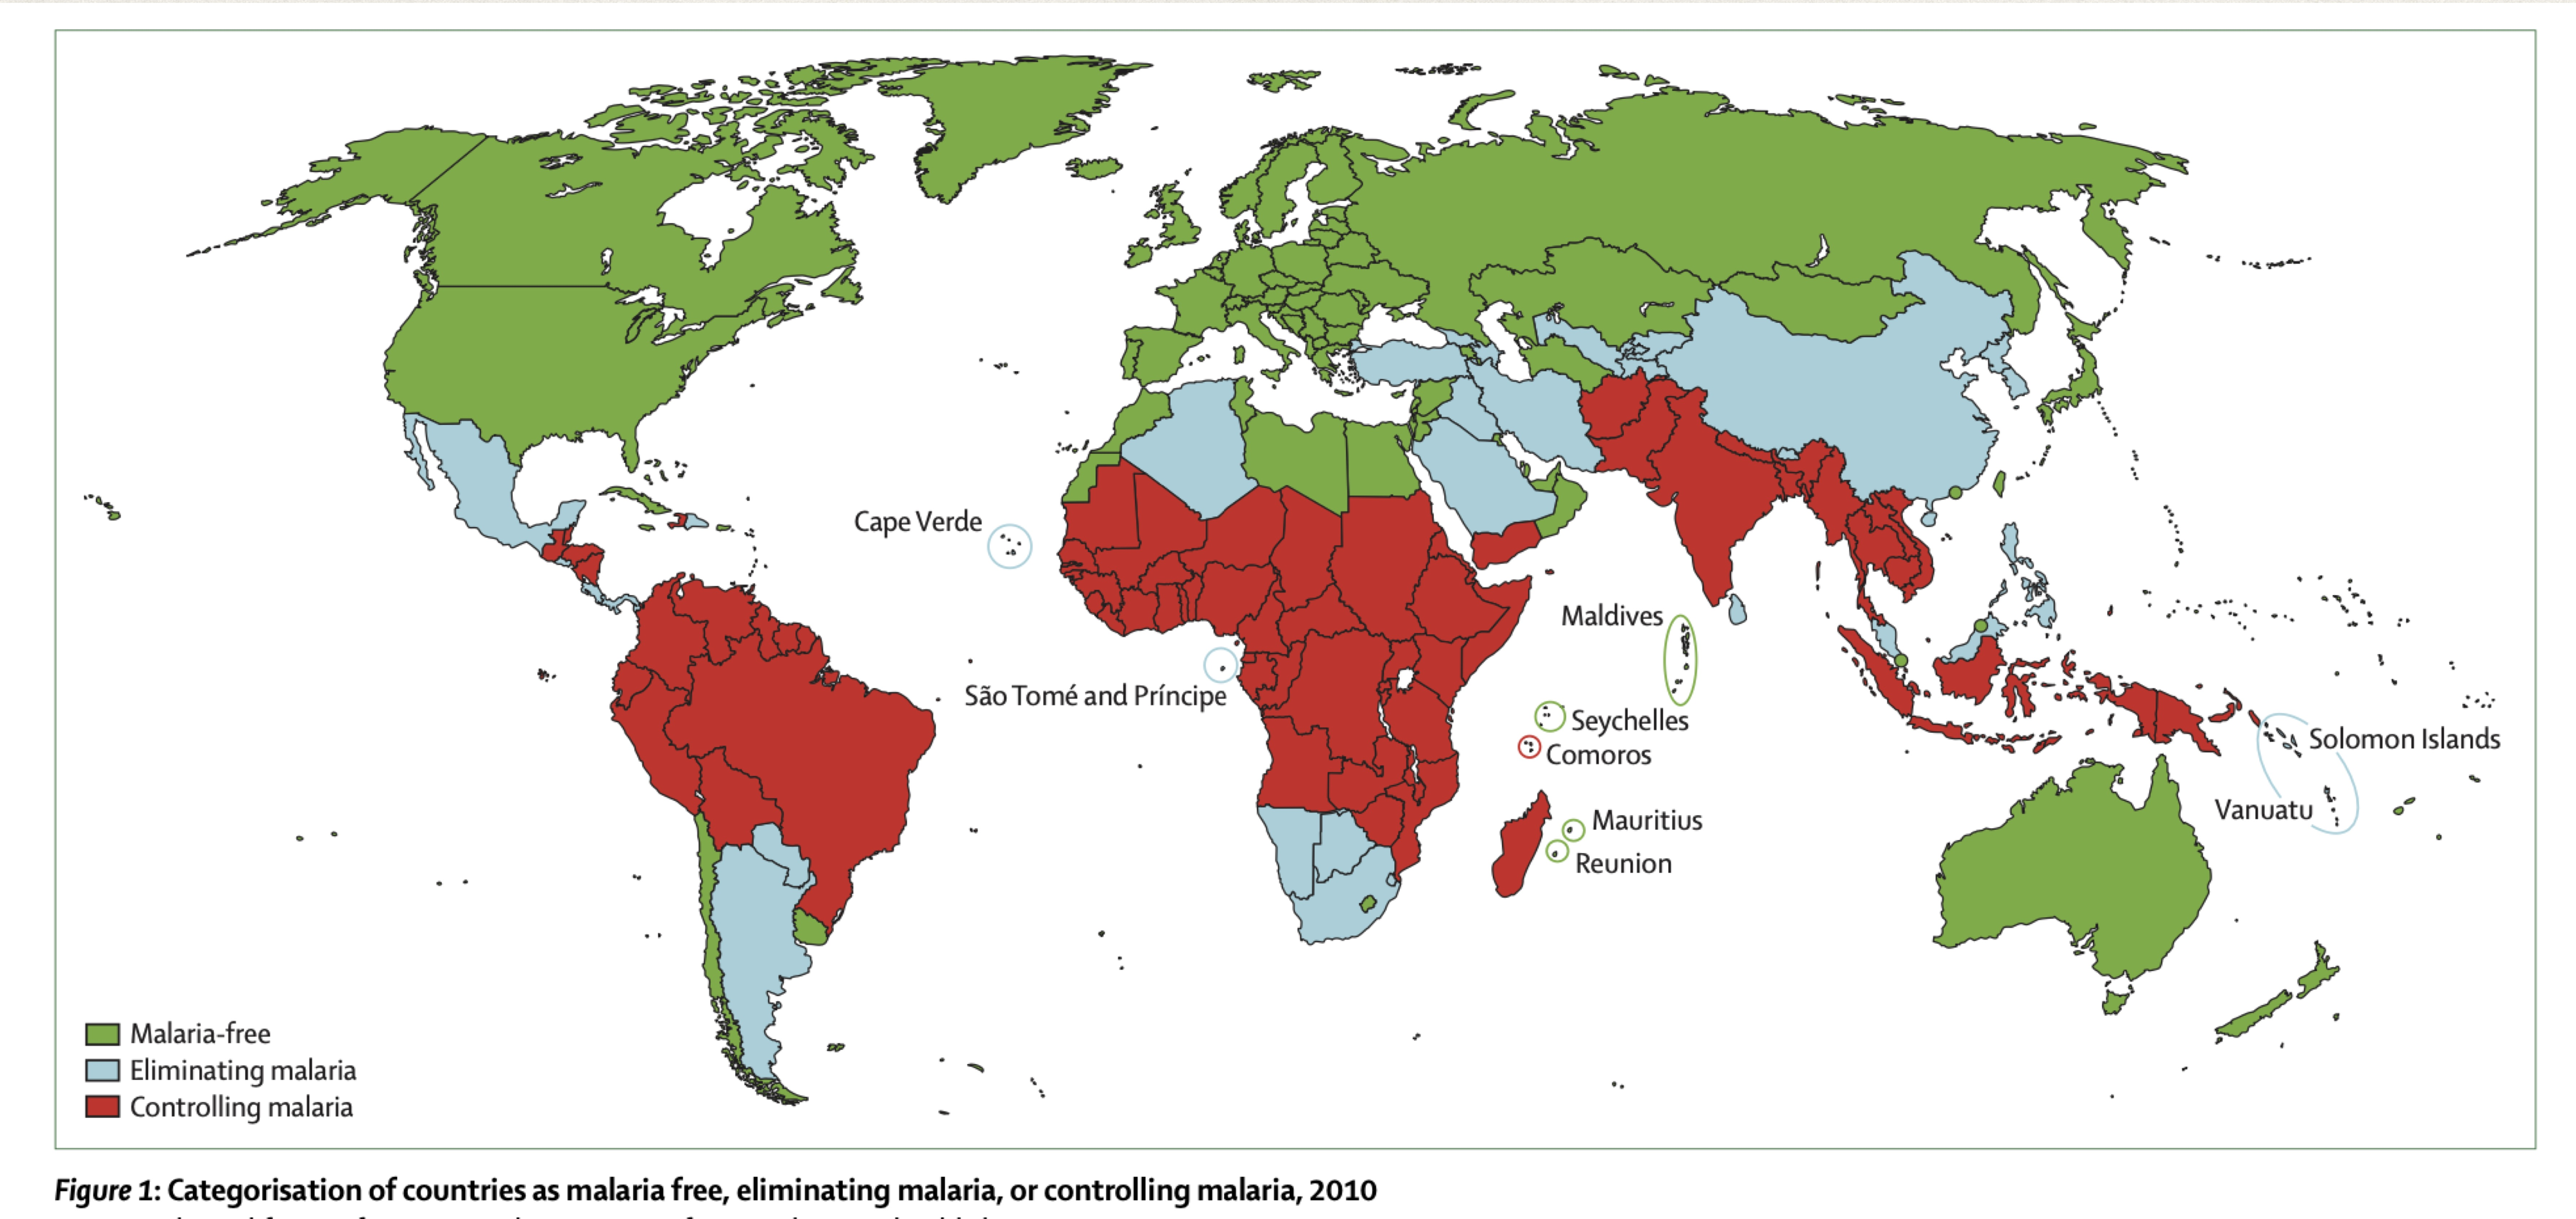

Malaria is a parasite called Plasmodium transmitted by female mosquito and infected Red Blood Cells (RBCs)

From WHO, 238 millions of people are hardly affected with almost half million of deaths per year

The poorest countries around the world are the most impacted

4 species of Plasmodium have been identified with different lifecycle stages 

*   According to Pasteur Institute, Plasmodium uses RBC’s chromatin for its own development
*   4 stages have been identified (ring, trophozoite, schizont, gametocyte) in their lifecycle with impacts of the cell shape and colors



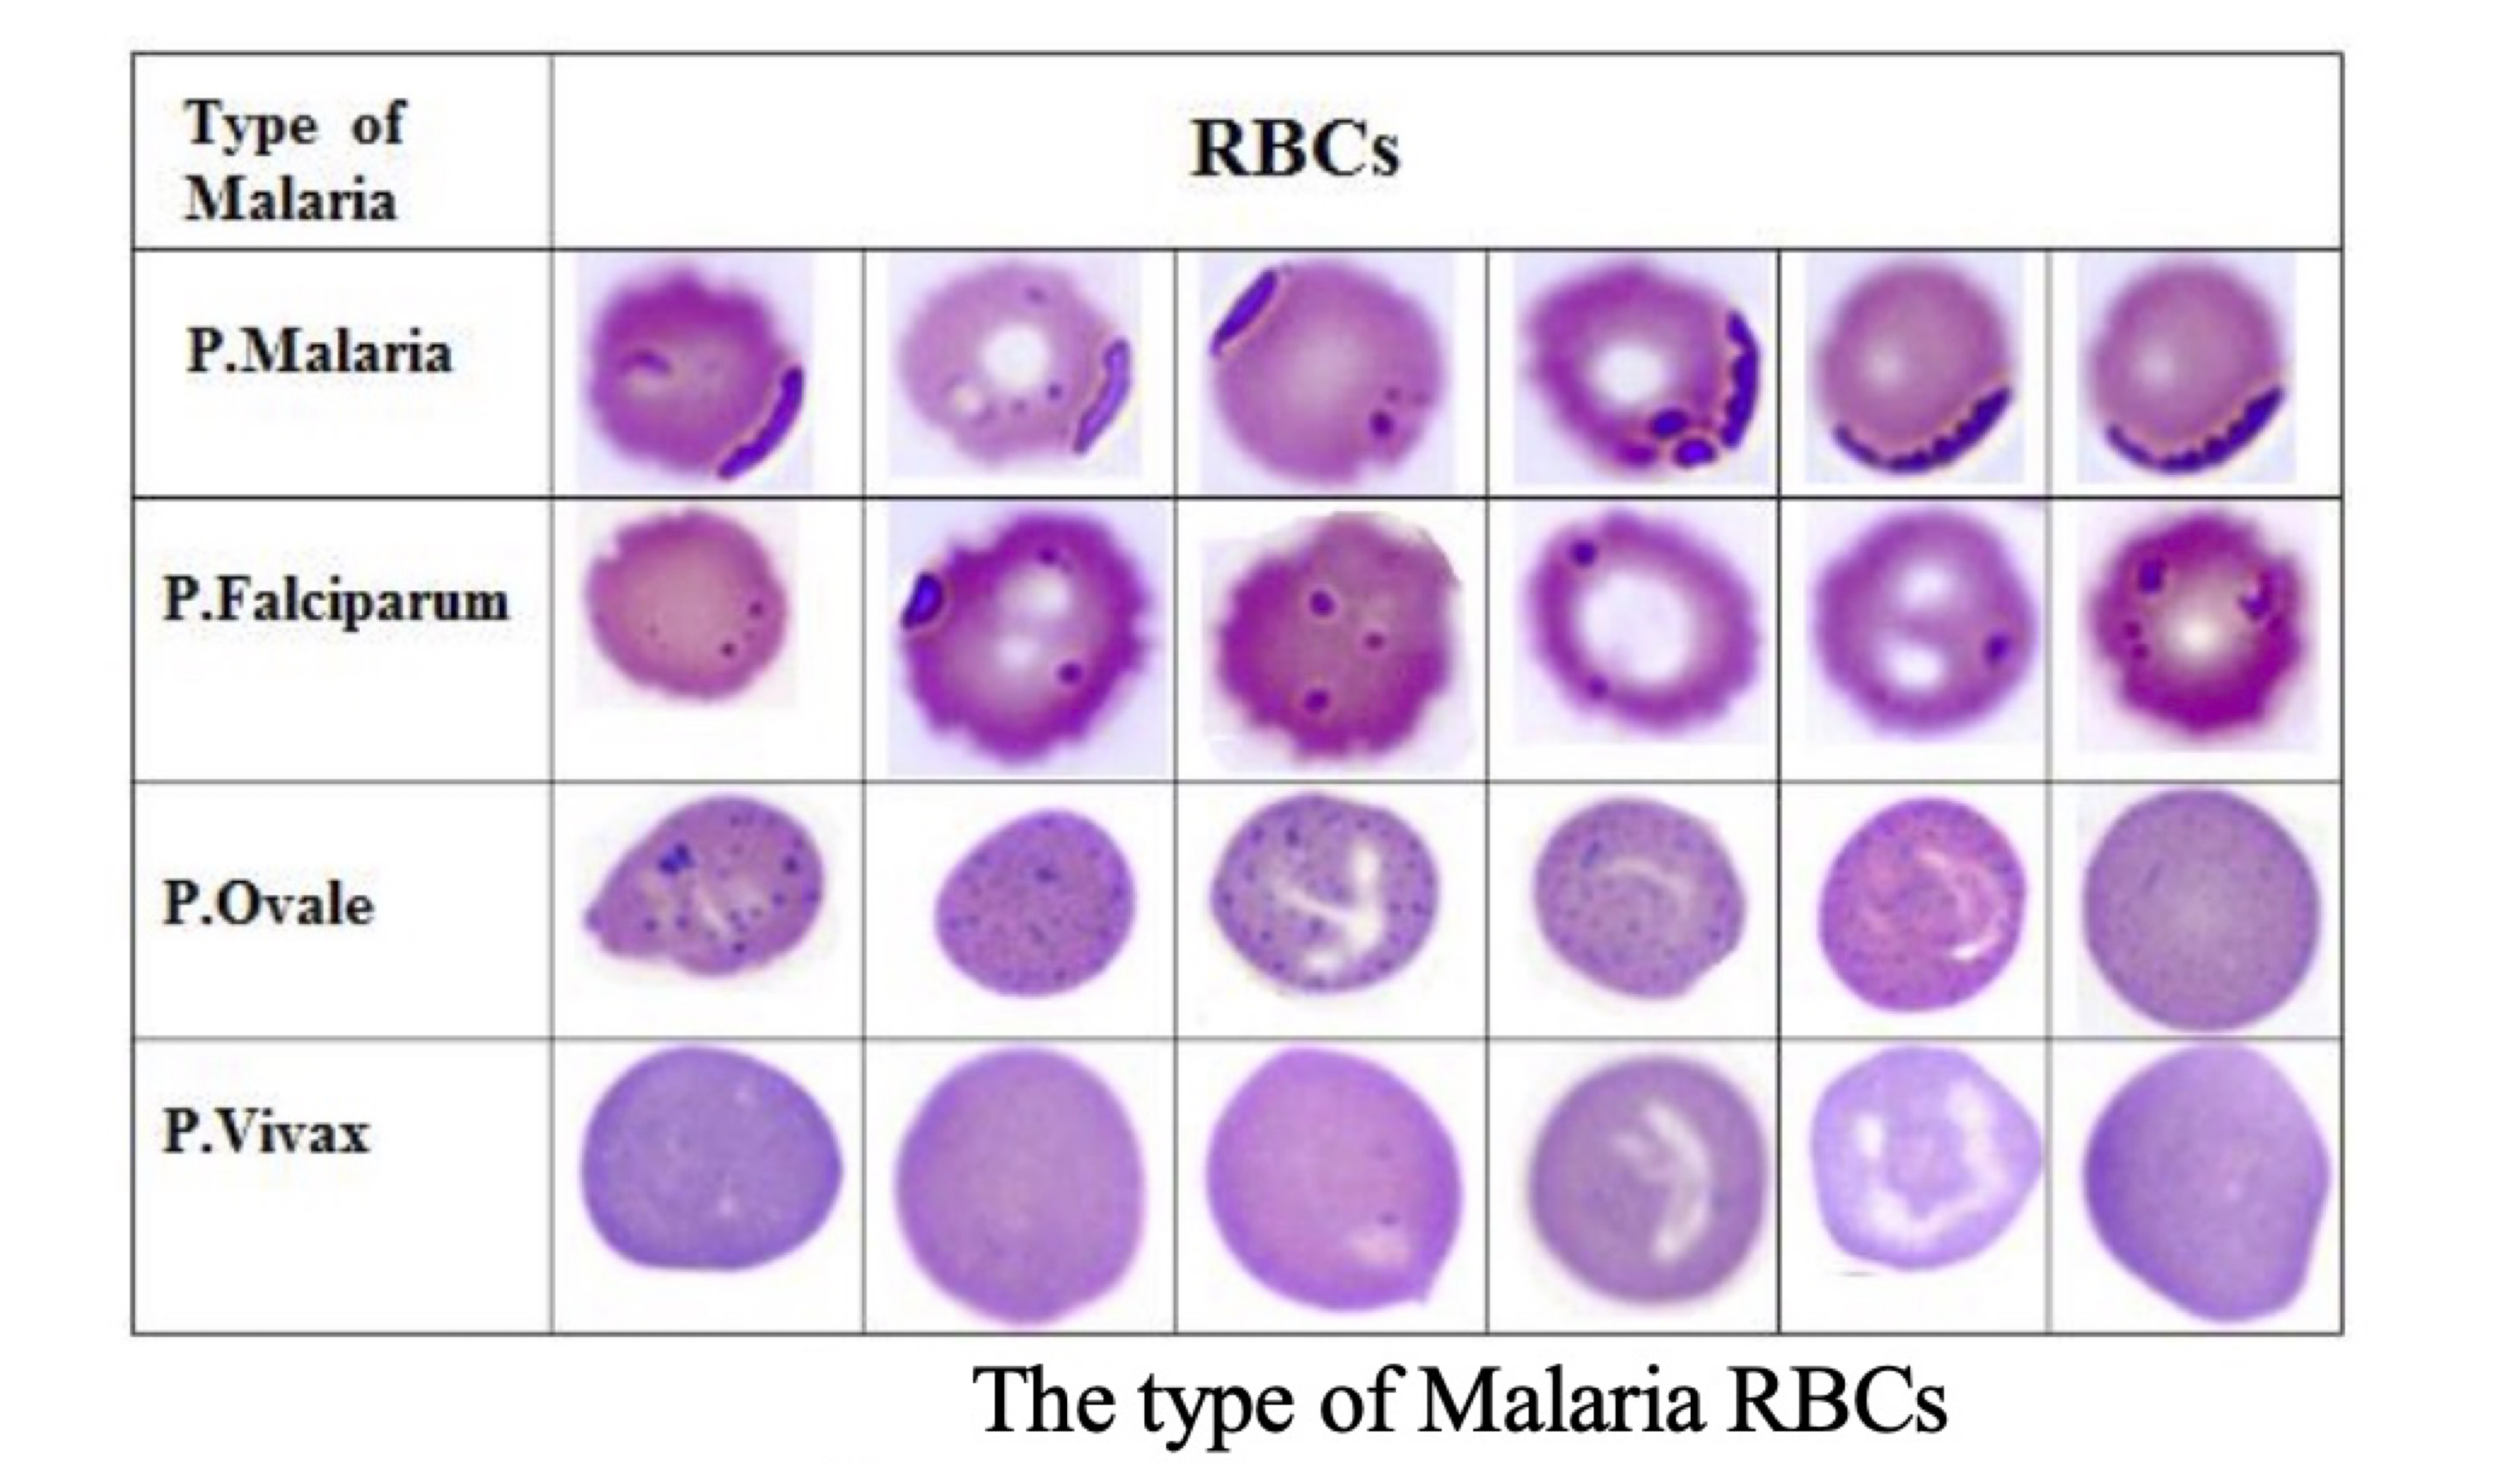

The distinct developmental stages of the parasite life cycles are characterized by coordinated changes in gene expression. (source : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4242472/)

Therefore, the coordinated cascade of transcripts observed throughout the parasite life cycles is likely to be regulated by additional components and mechanisms, such as changes in epigenetics and chromatin structure.

We can identified distinct chromatin features during parasite life cycles. (Confirmation : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5954139/)

This is the chromatin evolution we can see in the images provided. 

# The problem

Current methods to diagnose malaria are : 
* Rapid Diagnostic Test (RDT),
* Polymerase Chain Reaction (PCR)
* Microscopy
    *  RDT and PCR have their drawbacks and restrictions
    *  Although microscopy is the most often used tool for detecting malaria, its accuracy has been doubtful

Artificial Intelligence is a breakthrough in microscopy analysis by increasing diagnosis accuracy and speed

We can also imagine a microscope powered by AI to increase accuracy diagnosis

The objective is to evaluate different deep leaning classification algorithms by measuring their accuracy

# Methodology


* Pre-processing
    * Add a mean filter to correct different acquisition techniques in laboratory
    * Load by batches
    * Resize images according to CNN algorithms
    * Normalize images
* Choose the algorithm
    * CNNs (resnet, googlenet...)
* Perform the classification
* Compute errors and confusion matrix
* Compare different classification algorithms


# Algorithms

* Computers process images based on the values of their pixels. The processing of a 64 × 64 color image (in RGB) requires 12288 pixels:
    * The underlying relationships in a piece of data can be discovered using a neural network, which consists of layers of neurons.
    * In fully connected neural networks, the number of weights in the first hidden layer is 12288
    * As a result, we must deal with many parameters and increase the number of neurons in deep networks, which can result in overfitting
* CNN :
    * It has fewer weights and fewer neurons to manage because each neuron only connects to a small number of neurons in the previous layer rather than to all neurons.
    * Then, CNN outperforms fully connected neural networks in image classification
    * Requires 2 layers : convolutional and pooling

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


###<b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, LeakyReLU

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

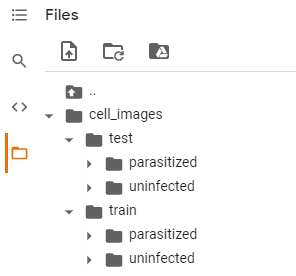

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Checking the shape of train images</b>

In [ ]:
# Shape of images
print("Test images set shape:", test_images.shape)
print("Train images set shape:", train_images.shape)


Test images set shape: (2600, 64, 64, 3)
Train images set shape: (24958, 64, 64, 3)


###<b> Checking the shape of test labels</b>

In [ ]:
# Shape of labels 
print("Test labels set shape:", test_labels.shape)
print("Train labels set shape:", train_labels.shape)

Test labels set shape: (2600,)
Train labels set shape: (24958,)


### <b>Check the minimum and maximum range of pixel values for train and test images</b>

In [ ]:
# Try to use min and max function from numpy

#Test set
print('min and max of Test images set are ', test_images.min(), test_images.max())

#Train set
print('min and max of Train images set are ', train_images.min(), train_images.max())

min and max of Test images set are  0 255
min and max of Train images set are  0 255


###<b> Count the number of values in both uninfected and parasitized</b>

In [ ]:
serie_test = pd.Series(test_labels)
serie_train = pd.Series(train_labels)
print("the number of parasitized and uninfected in test set are respectively : ")
print(serie_test.value_counts())
print()
print("the number of parasitized and uninfected in train set are respectively : ")
print(serie_train.value_counts())

the number of parasitized and uninfected in test set are respectively : 
1    1300
0    1300
dtype: int64

the number of parasitized and uninfected in train set are respectively : 
1    12582
0    12376
dtype: int64


###<b>Normalize the images</b>

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<b> Plot to check if the data is balanced

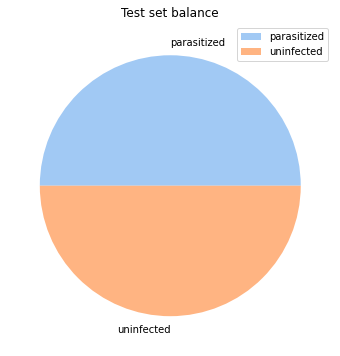

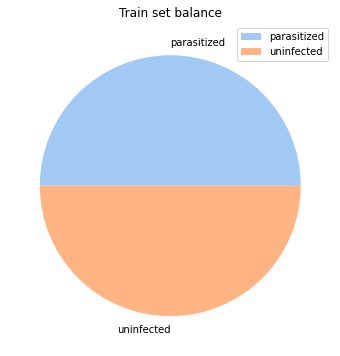

In [ ]:
colors = sns.color_palette('pastel')[0:5]

df = pd.DataFrame({'parasitized': serie_test.value_counts()[0], 
                   'uninfected': serie_test.value_counts()[1]},
                  index=['parasitized','uninfected'])
df.plot.pie(figsize=(6, 6), y='parasitized', colors=colors)
plt.axis('off')
plt.title('Test set balance')

df = pd.DataFrame({'parasitized': serie_train.value_counts()[0], 
                   'uninfected': serie_train.value_counts()[1]},
                  index=['parasitized','uninfected'])
df.plot.pie(figsize=(6, 6), y='parasitized', colors=colors)
plt.axis('off')
plt.title('Train set balance')
plt.show()

Observations and insights:

Train and Test sets are well balanced. Those datasets are uniformly subdivided between uninfected and parasitized cells

###<B>One Hot Encoding on the train and test labels

In [ ]:
from keras.utils import to_categorical

# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [ ]:
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 16s 7ms/step - loss: 0.3979 - accuracy: 0.8094 - val_loss: 0.2135 - val_accuracy: 0.9036
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1217 - accuracy: 0.9569 - val_loss: 0.1091 - val_accuracy: 0.9810
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0861 - accuracy: 0.9726 - val_loss: 0.0542 - val_accuracy: 0.9862
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0776 - accuracy: 0.9744 - val_loss: 0.0671 - val_accuracy: 0.9840
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0715 - accuracy: 0.9764 - val_loss: 0.0853 - val_accuracy: 0.9808


###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.9804

 Test_Accuracy:- 0.9803845882415771


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



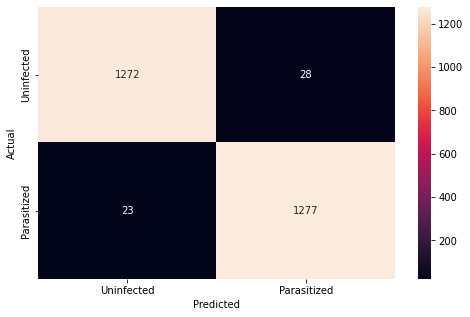

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

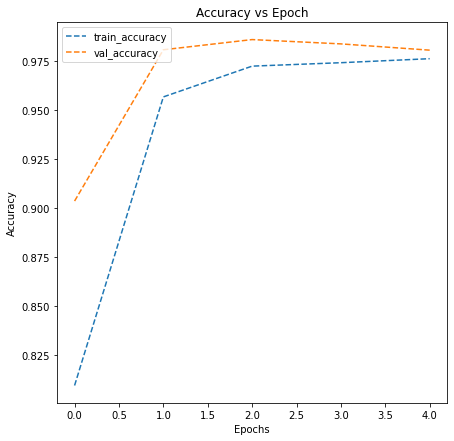

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))
model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax"))  

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 8ms/step - loss: 0.4986 - accuracy: 0.7298 - val_loss: 0.0881 - val_accuracy: 0.9844
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1038 - accuracy: 0.9652 - val_loss: 0.0800 - val_accuracy: 0.9796
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0855 - accuracy: 0.9721 - val_loss: 0.0337 - val_accuracy: 0.9926
Epoch 4/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0810 - accuracy: 0.9733 - val_loss: 0.0456 - val_accuracy: 0.9850
Epoch 5/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0756 - accuracy: 0.9752 - val_loss: 0.0570 - val_accuracy: 0.9798


###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9842

 Test_Accuracy:- 0.9842307567596436


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



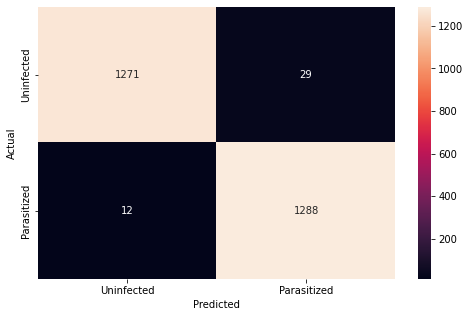

In [ ]:
pred1 = model1.predict(test_images)

pred1 = np.argmax(pred1, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred1))

# Plotting the heatmap using confusion matrix
cm1 = confusion_matrix(y_true, pred1)

plt.figure(figsize = (8, 5))

sns.heatmap(cm1, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

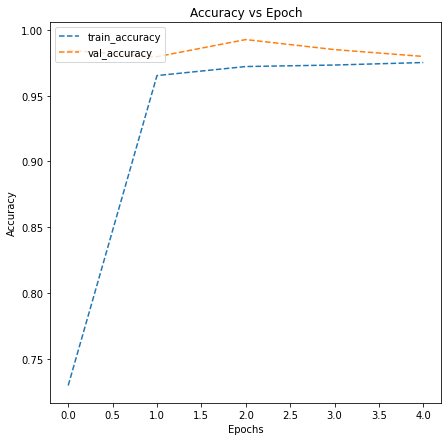

In [ ]:
plot_accuracy(history1)

Very few epochs are needed here 
The training increases
And we can also notice that validation accuracy is slightly higher than the train accuracy

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())
#model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = LeakyReLU()))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())
#model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = LeakyReLU()))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())
#model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512, activation = LeakyReLU()))
model2.add(BatchNormalization())
model2.add(Dense(2, activation = "softmax"))  
#model2.add(Dropout(0.4))

adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                        

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks2 = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks2, validation_split = 0.05, epochs = 20, verbose = 1)

Epoch 1/20
741/741 [==============================] - 5s 7ms/step - loss: 0.0719 - accuracy: 0.9768 - val_loss: 0.0307 - val_accuracy: 0.9920
Epoch 2/20
741/741 [==============================] - 5s 7ms/step - loss: 0.0694 - accuracy: 0.9768 - val_loss: 0.1054 - val_accuracy: 0.9720
Epoch 3/20
741/741 [==============================] - 5s 7ms/step - loss: 0.0604 - accuracy: 0.9790 - val_loss: 0.0245 - val_accuracy: 0.9904
Epoch 4/20
741/741 [==============================] - 5s 7ms/step - loss: 0.0604 - accuracy: 0.9798 - val_loss: 0.1275 - val_accuracy: 0.9631
Epoch 5/20
741/741 [==============================] - 5s 7ms/step - loss: 0.0576 - accuracy: 0.9809 - val_loss: 0.1269 - val_accuracy: 0.9760


<b>Plotting the train and validation accuracy

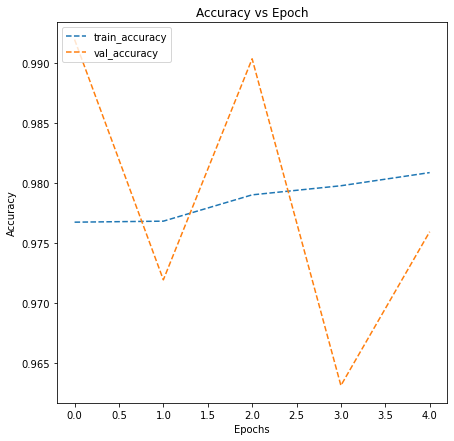

In [ ]:
# Plotting the accuracies
plot_accuracy(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy2 = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.9731

 Test_Accuracy:- 0.9730769395828247


####<b>Observations and insights: the accuracy is quite good


<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1300
           1       0.97      0.98      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



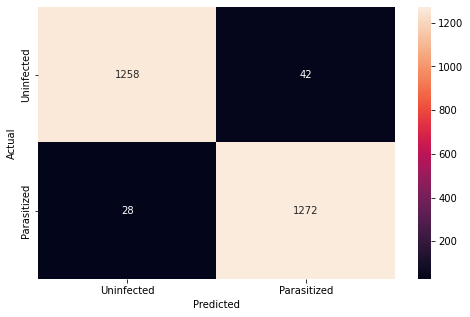

In [ ]:
pred2 = model2.predict(test_images)
pred2 = np.argmax(pred2, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred2))

# Plotting the heatmap using confusion matrix
cm2 = confusion_matrix(y_true, pred2)

plt.figure(figsize = (8, 5))

sns.heatmap(cm2, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

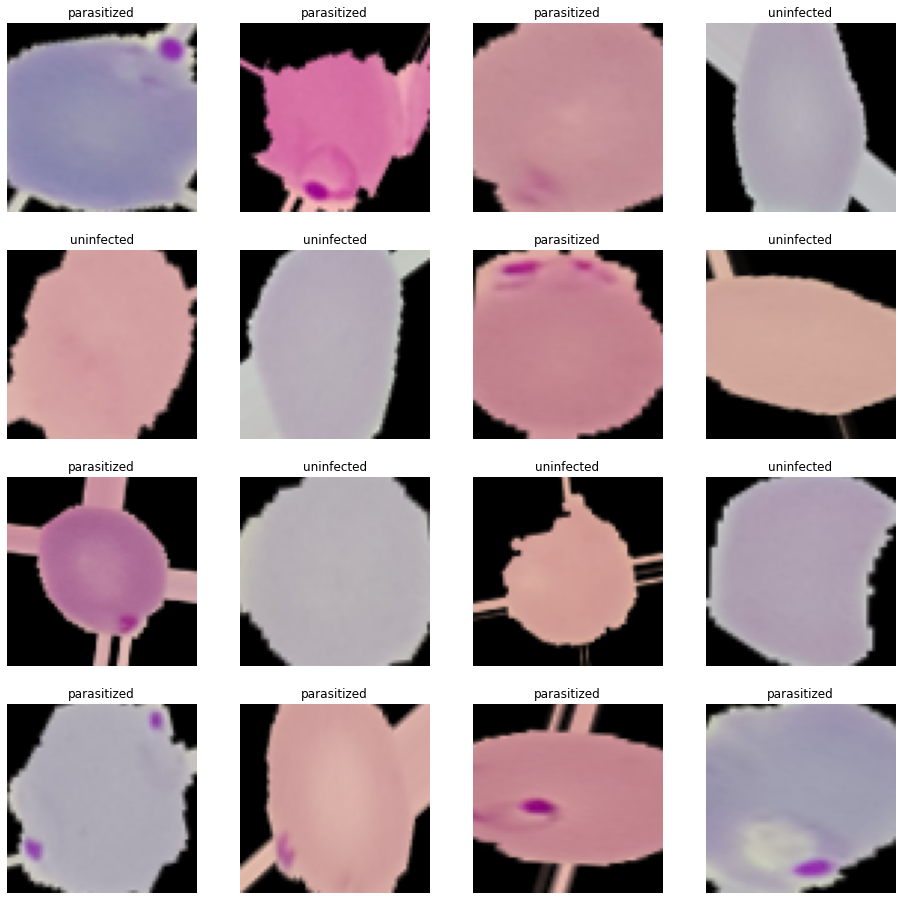

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: 
Data Augmentation may induce defaults in images

Nevertheless, as we already saw :

A human cell is a living organism. Its shape evolves during its lifetime from ovale to circle. Here we can see that each malaria parasite infects a cell. Their developments are different. But...

The 4 malaria species have in common in their lifecycle a ring-shape at the beginning of their development. This is what we called the ring stage.

It is quite clear that cells containing a ring-shape parasite are parasitized.
Also, Plasmodium parasite is not a virus nor a Bacteria. This is a parasite which infects a cell and develop itself inside the cell. For that it seems to use the chromatin.
Pasteur Institute thinks that the parasite combines its genetic set with the cell's one.
The chromatin is visualized by immunostaining a fixed sample or by expressing exogenous fluorescently tagged proteins in a live cell. Microscopy tools are also needs to see the evolution with time.
This is what we see in those datasets. The ring-shape is the use of the cell chromatin by the parasite.
This is an important indicator to detect the parasite. The chromatin size may differ from Plasmodium specy to another.
In other stages of parasite development, and depending of the Plasmodium specy, the shape of the cell may change.
The ring at the beginning of the parasite development evolves in Trophozoite.
The trophozoid can occupy up to 2/3 of the cell size. Its shape is like a big ring. Then the Schizont stage where the parasite multiplies itself. It is not always observed in all Plasmodium species. The Schizont stage can enlarge the original cell.
Then the gametocyte stage where the shape of the cell is like "frayed".

###<b>Building the Model

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))
model3.add(Dropout(0.4))
model3.add(Dense(2, activation = "sigmoid")) 

adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b>Using Callbacks

In [ ]:
callbacks3 = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, 
                      validation_data = val_generator,
                      batch_size = 32, callbacks = callbacks3,
                      epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 23s 71ms/step - loss: 0.6210 - accuracy: 0.6556 - val_loss: 0.3073 - val_accuracy: 0.9173
Epoch 2/20
312/312 [==============================] - 23s 72ms/step - loss: 0.2516 - accuracy: 0.8963 - val_loss: 0.1267 - val_accuracy: 0.9525
Epoch 3/20
312/312 [==============================] - 22s 71ms/step - loss: 0.2125 - accuracy: 0.9202 - val_loss: 0.1223 - val_accuracy: 0.9631
Epoch 4/20
312/312 [==============================] - 22s 70ms/step - loss: 0.1914 - accuracy: 0.9319 - val_loss: 0.1041 - val_accuracy: 0.9714
Epoch 5/20
312/312 [==============================] - 22s 70ms/step - loss: 0.1926 - accuracy: 0.9353 - val_loss: 0.1393 - val_accuracy: 0.9603
Epoch 6/20
312/312 [==============================] - 22s 70ms/step - loss: 0.1780 - accuracy: 0.9400 - val_loss: 0.0903 - val_accuracy: 0.9758
Epoch 7/20
312/312 [==============================] - 22s 70ms/step - loss: 0.1718 - accuracy: 0.9418 - val_loss: 0.0854 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

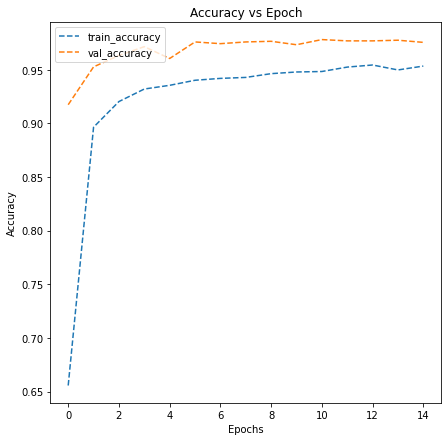

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9758

 Test_Accuracy:- 0.9757692217826843


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1300
           1       0.99      0.96      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



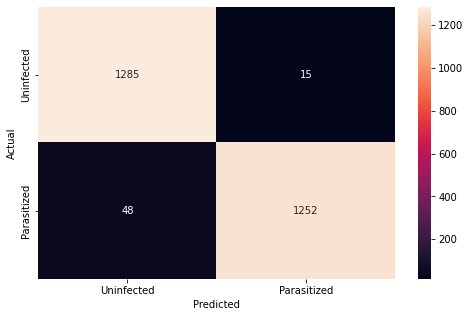

In [ ]:
pred3 = model3.predict(test_images)
pred3 = np.argmax(pred3, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred3))

# Plotting the heatmap using confusion matrix
cm3 = confusion_matrix(y_true, pred3)

plt.figure(figsize = (8, 5))

sns.heatmap(cm3, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(1, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model 
model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks4 = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(train_generator, 
                      validation_data = val_generator, 
                      batch_size = 32, callbacks = callbacks4, 
                      validation_split = 0.2, 
                      epochs = 10, verbose = 1)


Epoch 1/10


TypeError: ignored

<b>Plot the train and validation accuracy

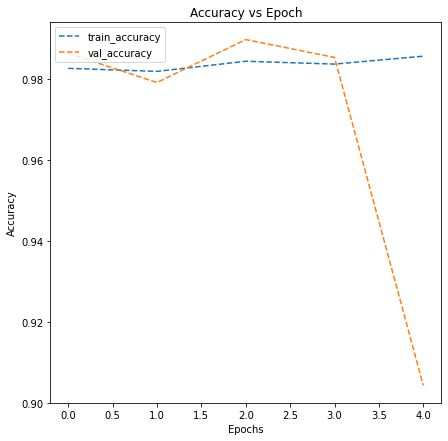

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data


<b>Plotting the classification report and confusion matrix

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?